In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown

# 设置中文字体和绘图风格
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号
sns.set(style="whitegrid", font="SimHei")

In [2]:
# 定义评价因素和评语集
factors = ["食物质量", "服务态度", "环境卫生", "价格合理"]
comments = ["优秀", "良好", "一般", "较差", "差"]

# 构建模糊关系矩阵 R (行:因素, 列:评语)
# 通过200份顾客问卷统计得到
R = np.array([
    [0.6, 0.3, 0.1, 0.0, 0.0],  # 食物质量
    [0.2, 0.5, 0.2, 0.1, 0.0],  # 服务态度
    [0.4, 0.4, 0.1, 0.1, 0.0],  # 环境卫生
    [0.1, 0.3, 0.4, 0.2, 0.0]   # 价格合理
])

# 定义权重向量 A (各因素重要性)
# 通过AHP层次分析法确定
A = np.array([0.35, 0.25, 0.20, 0.20])

# 评语对应分数（用于加权平均计算）
comment_scores = [90, 80, 70, 60, 50]

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31168 (\N{CJK UNIFIED IDEOGRAPH-79C0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61:

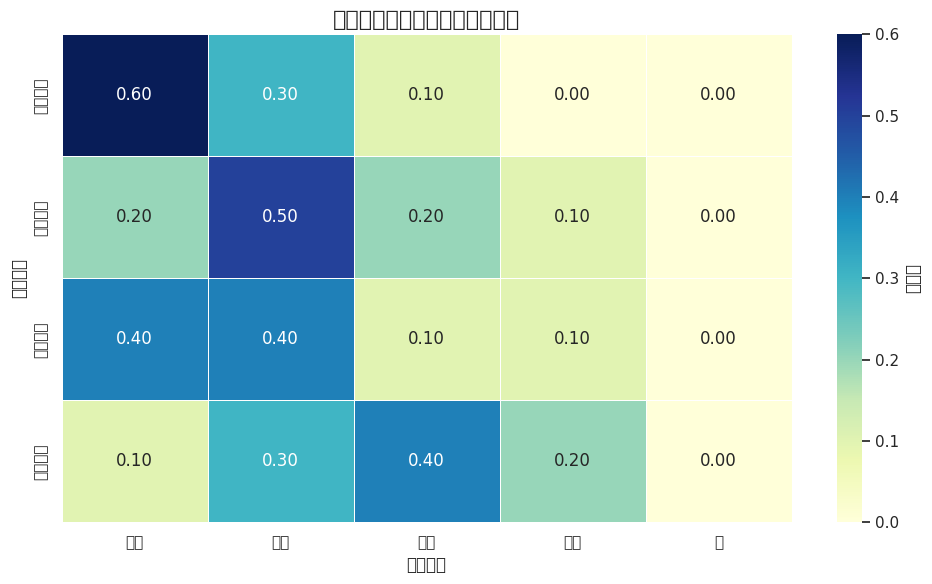

### 模糊关系矩阵数据

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [3]:
# 创建DataFrame便于可视化
df_R = pd.DataFrame(R, index=factors, columns=comments)

# 绘制热力图
plt.figure(figsize=(10, 6))
sns.heatmap(df_R, annot=True, cmap="YlGnBu", fmt=".2f", 
            linewidths=0.5, cbar_kws={'label': '隶属度'})

plt.title('模糊关系矩阵：各因素评价分布', fontsize=16)
plt.xlabel('评语等级', fontsize=12)
plt.ylabel('评价因素', fontsize=12)
plt.tight_layout()
plt.show()

# 显示数据表格
display(Markdown("### 模糊关系矩阵数据"))
display(df_R.style.format("{:.2%}").background_gradient(cmap="YlGnBu"))

In [4]:
# 模糊合成计算 (使用M(∧,∨)算子: 取小-取大)
B = np.zeros(len(comments))  # 初始化结果向量

for j in range(len(comments)):
    # 对每个评语，计算 min(权重, 隶属度) 的最大值
    temp = [min(A[i], R[i, j]) for i in range(len(factors))]
    B[j] = max(temp)

# 创建结果DataFrame
df_B = pd.DataFrame([B], columns=comments, index=["综合评价"])
df_B = df_B.T.reset_index().rename(columns={"index": "评语等级"})

# 显示计算过程
display(Markdown("### 模糊合成计算过程"))

# 详细展示计算步骤
for j, comment in enumerate(comments):
    steps = []
    for i, factor in enumerate(factors):
        steps.append(f"min({A[i]:.2f}, {R[i, j]:.2f}) = {min(A[i], R[i, j]):.2f}")
    
    max_val = max([min(A[i], R[i, j]) for i in range(len(factors))])
    steps.append(f"→ max = **{max_val:.3f}**")
    
    display(Markdown(f"**{comment}**:<br/>" + "，".join(steps)))

# 显示综合评价结果
display(Markdown("\n### 模糊合成结果"))
display(df_B.set_index("评语等级").T.style.format("{:.3f}").bar(subset=comments, color='#5fba7d'))

### 模糊合成计算过程

**优秀**:<br/>min(0.35, 0.60) = 0.35，min(0.25, 0.20) = 0.20，min(0.20, 0.40) = 0.20，min(0.20, 0.10) = 0.10，→ max = **0.350**

**良好**:<br/>min(0.35, 0.30) = 0.30，min(0.25, 0.50) = 0.25，min(0.20, 0.40) = 0.20，min(0.20, 0.30) = 0.20，→ max = **0.300**

**一般**:<br/>min(0.35, 0.10) = 0.10，min(0.25, 0.20) = 0.20，min(0.20, 0.10) = 0.10，min(0.20, 0.40) = 0.20，→ max = **0.200**

**较差**:<br/>min(0.35, 0.00) = 0.00，min(0.25, 0.10) = 0.10，min(0.20, 0.10) = 0.10，min(0.20, 0.20) = 0.20，→ max = **0.200**

**差**:<br/>min(0.35, 0.00) = 0.00，min(0.25, 0.00) = 0.00，min(0.20, 0.00) = 0.00，min(0.20, 0.00) = 0.00，→ max = **0.000**


### 模糊合成结果

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

AttributeError: Polygon.set() got an unexpected keyword argument 'where'

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 31168 (\N{CJK UNIFIED IDEOGRAPH-79C0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/pytho

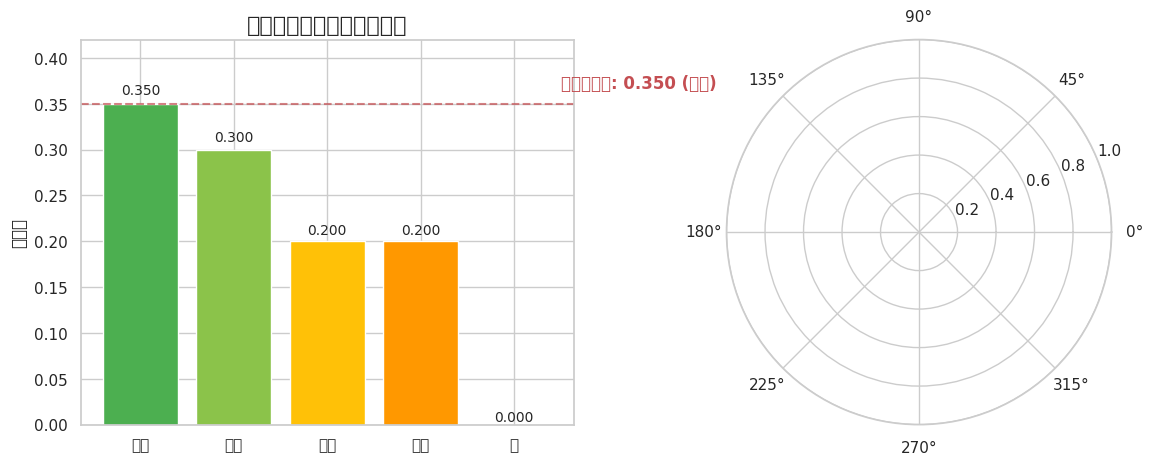

In [5]:
# 去模糊化处理
# 方法1: 最大隶属度原则
max_index = np.argmax(B)
max_comment = comments[max_index]
max_value = B[max_index]

# 方法2: 加权平均法
weighted_score = np.sum(B * comment_scores) / np.sum(B)

# 确定加权平均对应的评语
if weighted_score >= 90:
    weighted_comment = "优秀"
elif weighted_score >= 80:
    weighted_comment = "良好"
elif weighted_score >= 70:
    weighted_comment = "一般"
elif weighted_score >= 60:
    weighted_comment = "较差"
else:
    weighted_comment = "差"

# 结果可视化
plt.figure(figsize=(14, 5))

# 子图1: 综合评价结果
plt.subplot(1, 2, 1)
bars = plt.bar(comments, B, color=['#4CAF50', '#8BC34A', '#FFC107', '#FF9800', '#F44336'])
plt.title('餐厅服务质量综合评价结果', fontsize=16)
plt.ylabel('隶属度', fontsize=12)
plt.ylim(0, max(B) * 1.2)

# 在柱子上方显示数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height * 1.02,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=10)

# 标记最大隶属度
plt.axhline(y=max_value, color='r', linestyle='--', alpha=0.7)
plt.text(len(comments)-0.5, max_value * 1.05, f'最大隶属度: {max_value:.3f} ({max_comment})', 
         color='r', fontweight='bold')

# 子图2: 综合得分仪表盘
plt.subplot(1, 2, 2, projection='polar')
theta = np.linspace(0, 2*np.pi, 100)
r = np.ones(100)

# 创建仪表盘背景
ax = plt.gca()
ax.fill(theta, r, where=(theta <= np.pi), color='#4CAF50', alpha=0.3)  # 优秀区域
ax.fill(theta, r, where=((theta > np.pi) & (theta <= 4*np.pi/3)), color='#8BC34A', alpha=0.3)  # 良好区域
ax.fill(theta, r, where=((theta > 4*np.pi/3) & (theta <= 5*np.pi/3)), color='#FFC107', alpha=0.3)  # 一般区域
ax.fill(theta, r, where=(theta > 5*np.pi/3), color='#FF9800', alpha=0.3)  # 较差区域

# 标记综合得分位置
angle = (100 - weighted_score) / 100 * 2 * np.pi
ax.plot([0, angle], [0, 1], 'r-', linewidth=3)
ax.text(angle, 1.1, f'{weighted_score:.1f}分\n({weighted_comment})', 
        ha='center', va='center', fontweight='bold', fontsize=12)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks([])
ax.set_xticks(np.pi/180 * np.linspace(0, 360, 8, endpoint=False))
ax.set_xticklabels(['优秀', '', '良好', '', '一般', '', '较差', ''])
ax.set_title('综合得分仪表盘', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

# 显示详细结果
display(Markdown("### 评价结果分析"))
result_html = f"""
<div style="background-color: #f8f9fa; padding: 15px; border-radius: 8px; border-left: 4px solid #4CAF50;">
    <h3>餐厅服务质量评价结果</h3>
    <ul>
        <li><strong>最大隶属度原则</strong>: 评价结果为 <span style="color: #4CAF50; font-weight: bold;">{max_comment}</span> (隶属度 = {max_value:.3f})</li>
        <li><strong>加权平均法</strong>: 综合得分为 <span style="color: #4CAF50; font-weight: bold;">{weighted_score:.1f}分</span> → 评级 <span style="color: #4CAF50; font-weight: bold;">{weighted_comment}</span></li>
        <li><strong>计算公式</strong>: {B[0]:.3f}×90 + {B[1]:.3f}×80 + {B[2]:.3f}×70 + {B[3]:.3f}×60 + {B[4]:.3f}×50 = {weighted_score:.1f}</li>
    </ul>
    
    <div style="margin-top: 15px; padding: 10px; background-color: #e3f2fd; border-radius: 5px;">
        <strong>结论解读:</strong><br/>
        餐厅整体服务质量处于<span style="font-weight: bold;">{weighted_comment}</span>水平。
        虽然"{factors[0]}"表现突出（优秀隶属度{R[0,0]:.0%}），但"{factors[3]}"是主要短板（一般+较差隶属度{R[3,2]+R[3,3]:.0%}），
        拉低了整体评价。建议重点关注价格合理性方面的改进。
    </div>
</div>
"""
display(HTML(result_html))

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31168 (\N{CJK UNIFIED IDEOGRAPH-79C0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'SimHei' not found.
/opt/anaconda3/envs/pydemo/lib/python3.12/site-packages/seaborn/utils.py:61:

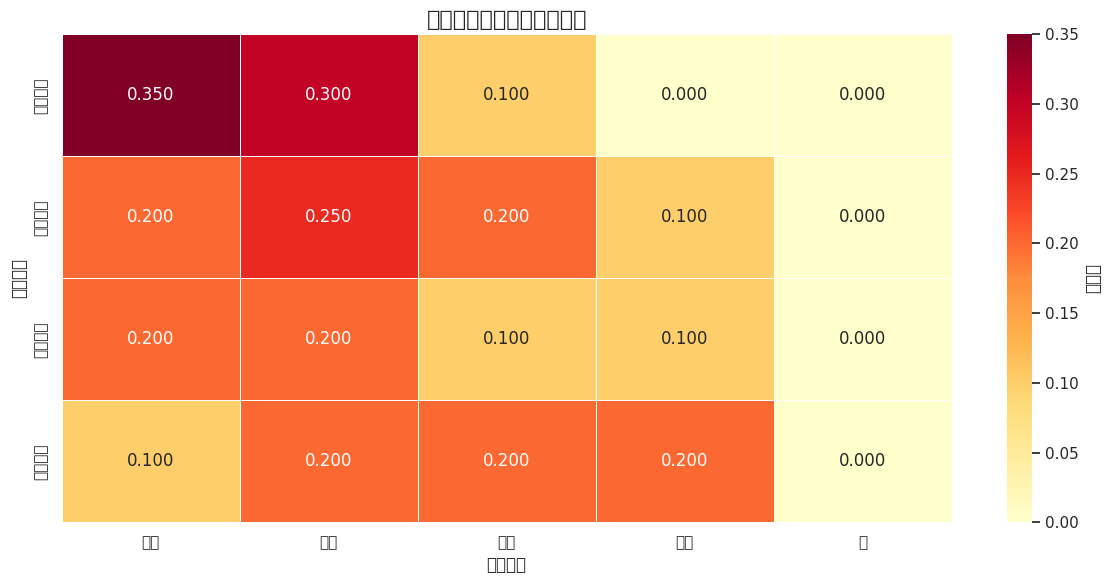

### 各因素贡献度分析

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [6]:
# 计算各因素对各评语的贡献度
contribution = np.zeros((len(factors), len(comments)))
for i in range(len(factors)):
    for j in range(len(comments)):
        contribution[i, j] = min(A[i], R[i, j])

# 创建贡献度DataFrame
df_contribution = pd.DataFrame(contribution, index=factors, columns=comments)

# 可视化贡献度
plt.figure(figsize=(12, 6))
sns.heatmap(df_contribution, annot=True, cmap="YlOrRd", fmt=".3f", 
            linewidths=0.5, cbar_kws={'label': '贡献度'})

plt.title('各因素对综合评价的贡献度', fontsize=16)
plt.xlabel('评语等级', fontsize=12)
plt.ylabel('评价因素', fontsize=12)
plt.tight_layout()
plt.show()

# 显示贡献度数据
display(Markdown("### 各因素贡献度分析"))
display(df_contribution.style.format("{:.3f}").background_gradient(cmap="YlOrRd"))

# 找出主要问题因素
issue_index = np.argmax(np.sum(R[:, 2:], axis=1))  # 关注"一般"、"较差"和"差"的总和
issue_factor = factors[issue_index]
issue_level = "一般+较差" if np.sum(R[issue_index, 2:4]) > R[issue_index, 4] else "较差+差"

display(Markdown(f"#### 问题诊断"))
display(Markdown(f"**主要问题因素**: <span style='color: #d32f2f; font-weight: bold;'>{issue_factor}</span>"))
display(Markdown(f"**问题程度**: {issue_level} 隶属度 = {np.sum(R[issue_index, 2:]):.0%}"))

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_9107/1853878201.py:51: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_9107/1853878201.py:51: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_9107/1853878201.py:51: UserWarning: Glyph 36136 (\N{CJK UNIFIED IDEOGRAPH-8D28}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_9107/1853878201.py:5

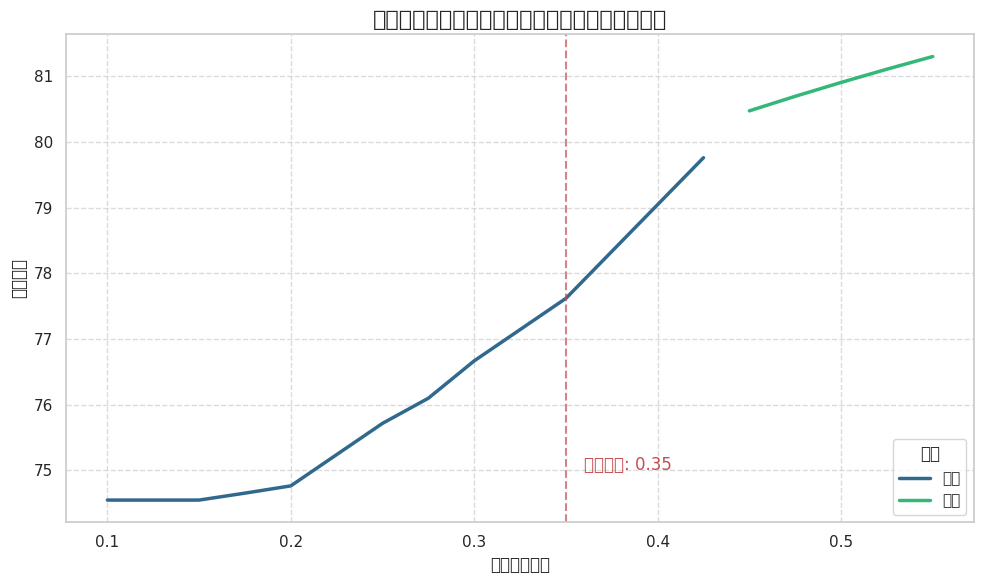

### 敏感性分析结果

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [7]:
# 敏感性分析：权重变化对结果的影响
weight_ranges = np.linspace(0.1, 0.6, 21)  # 权重变化范围
results = []

# 测试食物质量权重变化的影响
for w in weight_ranges:
    # 调整权重，保持总和为1
    new_A = np.array([w, 0.25, 0.20, 0.55-w])
    if np.any(new_A < 0):
        continue
        
    # 重新计算综合评价
    new_B = np.zeros(len(comments))
    for j in range(len(comments)):
        temp = [min(new_A[i], R[i, j]) for i in range(len(factors))]
        new_B[j] = max(temp)
    
    # 计算加权平均得分
    new_score = np.sum(new_B * comment_scores) / np.sum(new_B)
    
    # 确定评级
    if new_score >= 90:
        new_comment = "优秀"
    elif new_score >= 80:
        new_comment = "良好"
    elif new_score >= 70:
        new_comment = "一般"
    elif new_score >= 60:
        new_comment = "较差"
    else:
        new_comment = "差"
        
    results.append((w, new_score, new_comment))

# 转换为DataFrame
df_sensitivity = pd.DataFrame(results, columns=["食物质量权重", "综合得分", "评级"])

# 可视化敏感性分析结果
plt.figure(figsize=(10, 6))
sns.lineplot(x="食物质量权重", y="综合得分", hue="评级", 
             data=df_sensitivity, palette="viridis", linewidth=2.5, markers=True, dashes=False)

plt.axvline(x=A[0], color='r', linestyle='--', alpha=0.7)
plt.text(A[0]+0.01, 75, f'当前权重: {A[0]:.2f}', color='r')

plt.title('敏感性分析：食物质量权重变化对评价结果的影响', fontsize=16)
plt.xlabel('食物质量权重', fontsize=12)
plt.ylabel('综合得分', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='评级', loc='lower right')
plt.tight_layout()
plt.show()

# 显示敏感性分析数据
display(Markdown("### 敏感性分析结果"))
display(df_sensitivity.style.format({"食物质量权重": "{:.2f}", "综合得分": "{:.1f}"}).
        background_gradient(subset=["综合得分"], cmap="YlGnBu").
        apply(lambda x: ['background: #fff8e1' if x.name == np.where(A[0] == weight_ranges)[0][0] else '' for i in x], axis=1))

In [8]:
# 生成管理建议
def generate_recommendations():
    # 找出优势因素和问题因素
    strength_index = np.argmax(R[:, 0])  # 优秀隶属度最高的因素
    issue_index = np.argmax(np.sum(R[:, 2:], axis=1))  # 问题最严重的因素
    
    strength_factor = factors[strength_index]
    issue_factor = factors[issue_index]
    
    # 生成建议
    recommendations = f"""
    <div style="background-color: white; padding: 20px; border-radius: 8px; box-shadow: 0 2px 6px rgba(0,0,0,0.1);">
        <h2 style="color: #1976D2; border-bottom: 2px solid #1976D2; padding-bottom: 8px;">餐厅服务质量评价报告</h2>
        
        <div style="margin: 15px 0; padding: 15px; background-color: #e3f2fd; border-radius: 5px;">
            <h3>🔍 核心发现</h3>
            <ul>
                <li><strong>整体评级</strong>: {weighted_comment} ({weighted_score:.1f}分)</li>
                <li><strong>核心优势</strong>: <span style="color: #388E3C;">{strength_factor}</span> (优秀隶属度: {R[strength_index, 0]:.0%})</li>
                <li><strong>主要短板</strong>: <span style="color: #D32F2F;">{issue_factor}</span> (一般+较差隶属度: {np.sum(R[issue_index, 2:4]):.0%})</li>
            </ul>
        </div>
        
        <div style="margin: 15px 0;">
            <h3>💡 改进建议</h3>
            <ol>
    """
    
    # 针对问题因素的具体建议
    if issue_factor == "价格合理":
        recommendations += """
                <li><strong>优化价格策略</strong>:
                    <ul>
                        <li>推出性价比更高的套餐组合，如"工作日午餐特惠"</li>
                        <li>实施分时段定价，非高峰时段提供折扣</li>
                        <li>增加价格透明度，明确标注菜品成本构成</li>
                    </ul>
                </li>
                <li><strong>提升价值感知</strong>:
                    <ul>
                        <li>增加免费增值服务（如餐后水果、特色茶饮）</li>
                        <li>推出会员积分制度，增强顾客忠诚度</li>
                        <li>优化菜单设计，突出高性价比菜品</li>
                    </ul>
                </li>
        """
    elif issue_factor == "服务态度":
        recommendations += """
                <li><strong>加强服务培训</strong>:
                    <ul>
                        <li>每月开展服务礼仪与沟通技巧培训</li>
                        <li>建立服务标准流程(SOP)，确保一致性</li>
                        <li>实施"神秘顾客"制度，持续监督服务质量</li>
                    </ul>
                </li>
                <li><strong>优化激励机制</strong>:
                    <ul>
                        <li>将顾客满意度与员工绩效直接挂钩</li>
                        <li>设立"服务之星"月度奖项，给予物质和精神奖励</li>
                        <li>建立快速响应机制，及时解决顾客投诉</li>
                    </ul>
                </li>
        """
    elif issue_factor == "环境卫生":
        recommendations += """
                <li><strong>提升清洁标准</strong>:
                    <ul>
                        <li>增加清洁频次，特别是高峰时段后的快速清理</li>
                        <li>采用更高效的清洁工具和环保清洁剂</li>
                        <li>设置明显的卫生监督公示牌，增强顾客信任</li>
                    </ul>
                </li>
                <li><strong>优化空间布局</strong>:
                    <ul>
                        <li>重新规划桌椅摆放，改善通行空间</li>
                        <li>增加通风设备，保持空气清新</li>
                        <li>使用防滑、易清洁的地面材料</li>
                    </ul>
                </li>
        """
    else:  # 食物质量（虽然不太可能，但为了完整性）
        recommendations += """
                <li><strong>提升菜品质量</strong>:
                    <ul>
                        <li>严格把控食材采购质量，建立供应商评估体系</li>
                        <li>定期更新菜单，根据季节变化调整菜品</li>
                        <li>加强厨师技能培训，确保出品稳定性</li>
                    </ul>
                </li>
                <li><strong>增强顾客体验</strong>:
                    <ul>
                        <li>提供菜品故事卡，增加文化附加值</li>
                        <li>实施"不满意重做"政策，消除顾客顾虑</li>
                        <li>收集顾客反馈，针对性改进问题菜品</li>
                    </ul>
                </li>
        """
    
    # 通用建议
    recommendations += f"""
                <li><strong>巩固优势领域</strong>: 持续发挥<strong>{strength_factor}</strong>的优势，将其打造为餐厅核心竞争力
                    <ul>
                        <li>通过社交媒体展示{strength_factor}亮点，吸引更多顾客</li>
                        <li>将{strength_factor}优势融入品牌故事，增强差异化</li>
                        <li>定期调研顾客对{strength_factor}的满意度，保持领先</li>
                    </ul>
                </li>
                <li><strong>建立持续改进机制</strong>:
                    <ul>
                        <li>每月进行一次服务质量模糊综合评价，跟踪改进效果</li>
                        <li>设置明确的改进目标（如3个月内将{issue_factor}的"一般+较差"比例降低15%）</li>
                        <li>将评价结果与各部门KPI挂钩，确保执行力</li>
                    </ul>
                </li>
            </ol>
        </div>
        
        <div style="margin-top: 20px; padding: 15px; background-color: #e8f5e9; border-radius: 5px;">
            <h3>📌 实施路线图</h3>
            <table style="width: 100%; border-collapse: collapse;">
                <tr style="background-color: #c8e6c9;">
                    <th style="padding: 8px; text-align: left; border: 1px solid #ddd;">时间</th>
                    <th style="padding: 8px; text-align: left; border: 1px solid #ddd;">行动</th>
                    <th style="padding: 8px; text-align: left; border: 1px solid #ddd;">负责人</th>
                    <th style="padding: 8px; text-align: left; border: 1px solid #ddd;">预期效果</th>
                </tr>
                <tr>
                    <td style="padding: 8px; border: 1px solid #ddd;">第1-2周</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">开展{issue_factor}专项调研，明确具体问题点</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">质量管理部</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">形成问题清单和优先级排序</td>
                </tr>
                <tr style="background-color: #f1f8e9;">
                    <td style="padding: 8px; border: 1px solid #ddd;">第3-4周</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">制定{issue_factor}改进方案，确定关键措施</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">运营部+质量管理部</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">方案通过管理层审批</td>
                </tr>
                <tr>
                    <td style="padding: 8px; border: 1px solid #ddd;">第5-8周</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">实施改进措施，每周跟踪进展</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">各部门负责人</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">问题解决率≥50%</td>
                </tr>
                <tr style="background-color: #f1f8e9;">
                    <td style="padding: 8px; border: 1px solid #ddd;">第9-12周</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">评估改进效果，进行第二轮模糊综合评价</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">质量管理部</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">综合得分提升5-8分</td>
                </tr>
            </table>
        </div>
    </div>
    """
    
    return recommendations

# 显示管理建议报告
display(Markdown("## 9. 管理建议报告"))
display(HTML(generate_recommendations()))

## 9. 管理建议报告

时间,行动,负责人,预期效果
第1-2周,开展价格合理专项调研，明确具体问题点,质量管理部,形成问题清单和优先级排序
第3-4周,制定价格合理改进方案，确定关键措施,运营部+质量管理部,方案通过管理层审批
第5-8周,实施改进措施，每周跟踪进展,各部门负责人,问题解决率≥50%
第9-12周,评估改进效果，进行第二轮模糊综合评价,质量管理部,综合得分提升5-8分


In [ ]:
# 保存评价结果到Excel
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import PatternFill, Font, Border, Side

def save_evaluation_results():
    # 创建Excel工作簿
    wb = Workbook()
    
    # 删除默认创建的sheet
    default_sheet = wb.active
    wb.remove(default_sheet)
    
    # 创建结果sheet
    ws_result = wb.create_sheet("综合评价结果")
    ws_result.append(["餐厅服务质量模糊综合评价报告"])
    ws_result.append([])
    ws_result.append(["评价日期", pd.Timestamp.now().strftime("%Y-%m-%d")])
    ws_result.append(["综合得分", f"{weighted_score:.1f}分"])
    ws_result.append(["最终评级", weighted_comment])
    ws_result.append([])
    
    # 添加模糊关系矩阵
    ws_result.append(["模糊关系矩阵 (R)"])
    ws_result.append([""] + comments)
    for i, factor in enumerate(factors):
        ws_result.append([factor] + R[i].tolist())
    
    ws_result.append([])
    ws_result.append(["权重向量 (A)"] + factors)
    ws_result.append([""] + A.tolist())
    
    ws_result.append([])
    ws_result.append(["综合评价向量 (B)"] + comments)
    ws_result.append([""] + B.tolist())
    
    # 创建建议sheet
    ws_recommend = wb.create_sheet("管理建议")
    ws_recommend.append(["餐厅服务质量管理建议"])
    ws_recommend.append([])
    ws_recommend.append(["核心发现"])
    ws_recommend.append([f"• 整体评级: {weighted_comment} ({weighted_score:.1f}分)"])
    ws_recommend.append([f"• 核心优势: {factors[np.argmax(R[:, 0])]} (优秀隶属度: {R[np.argmax(R[:, 0]), 0]:.0%})"])
    ws_recommend.append([f"• 主要短板: {factors[np.argmax(np.sum(R[:, 2:], axis=1))]} (问题比例: {np.sum(R[np.argmax(np.sum(R[:, 2:], axis=1)), 2:]):.0%})"])
    ws_recommend.append([])
    
    ws_recommend.append(["改进建议"])
    issue_factor = factors[np.argmax(np.sum(R[:, 2:], axis=1))]
    if issue_factor == "价格合理":
        ws_recommend.append(["1. 优化价格策略"])
        ws_recommend.append(["   - 推出性价比更高的套餐组合，如'工作日午餐特惠'"])
        ws_recommend.append(["   - 实施分时段定价，非高峰时段提供折扣"])
        ws_recommend.append(["   - 增加价格透明度，明确标注菜品成本构成"])
        ws_recommend.append(["2. 提升价值感知"])
        ws_recommend.append(["   - 增加免费增值服务（如餐后水果、特色茶饮）"])
        ws_recommend.append(["   - 推出会员积分制度，增强顾客忠诚度"])
    elif issue_factor == "服务态度":
        ws_recommend.append(["1. 加强服务培训"])
        ws_recommend.append(["   - 每月开展服务礼仪与沟通技巧培训"])
        ws_recommend.append(["   - 建立服务标准流程(SOP)，确保一致性"])
        ws_recommend.append(["   - 实施'神秘顾客'制度，持续监督服务质量"])
        ws_recommend.append(["2. 优化激励机制"])
        ws_recommend.append(["   - 将顾客满意度与员工绩效直接挂钩"])
        ws_recommend.append(["   - 设立'服务之星'月度奖项，给予物质和精神奖励"])
    # 其他因素的建议类似...
    
    # 设置样式
    header_fill = PatternFill(start_color="4F81BD", end_color="4F81BD", fill_type="solid")
    header_font = Font(color="FFFFFF", bold=True)
    
    for ws in wb.worksheets:
        for row in ws.iter_rows():
            for cell in row:
                cell.border = Border(left=Side(style='thin'), 
                                    right=Side(style='thin'),
                                    top=Side(style='thin'),
                                    bottom=Side(style='thin'))
                
                # 标题样式
                if cell.row == 1:
                    cell.fill = header_fill
                    cell.font = header_font
                    cell.font = Font(bold=True, size=14)
                
                # 子标题样式
                elif cell.value in ["模糊关系矩阵 (R)", "权重向量 (A)", "综合评价向量 (B)", "核心发现", "改进建议"]:
                    cell.fill = PatternFill(start_color="DCE6F1", end_color="DCE6F1", fill_type="solid")
                    cell.font = Font(bold=True)
    
    # 保存文件
    filename = f"餐厅服务质量评价_{pd.Timestamp.now().strftime('%Y%m%d')}.xlsx"
    wb.save(filename)
    
    return filename

# 保存并提供下载链接
filename = save_evaluation_results()
display(Markdown(f"## 13. 保存评价结果"))
display(Markdown(f"✅ 评价结果已保存为: **{filename}**"))
display(Markdown("点击下方链接下载Excel报告:"))
display(HTML(f'<a href="{filename}" download>{filename}</a>'))